# Programming Assignment-1

Biuld a CNN model to classify the MNIST handwrittendigits dataset.


*   Try to get an accuracy over 98.2%
*   Use different loss function (Adam, SGD, RMSProp)
*   Analyze the affect of using and not using data normalization. 

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Lable: 5


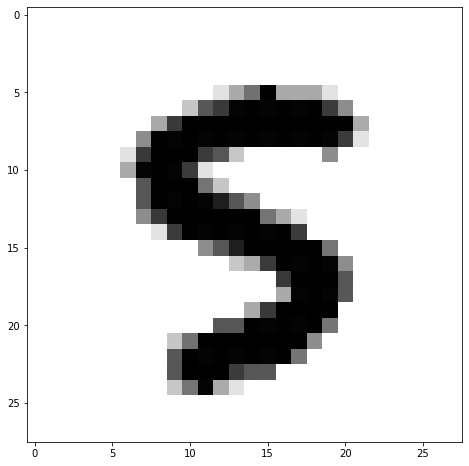

In [18]:
plt.figure(figsize=(20,8))
i = 1556
print("Lable: {}".format(Y_train[i]))
plt.imshow(X_train[i], cmap='gray_r')


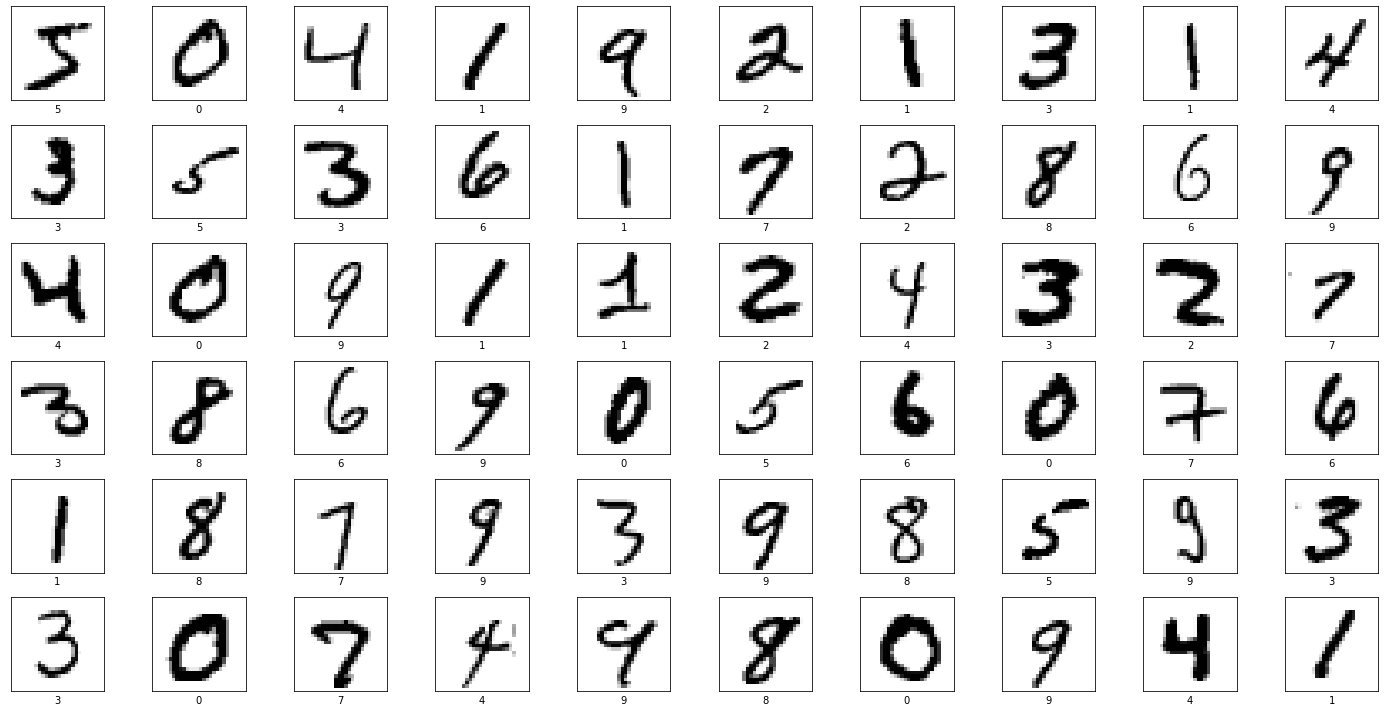

In [26]:
ROWS = 6
COLS = 10
i = 0

plt.figure(figsize=(20,10))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [27]:
X_train = X_train.reshape(-1, 28,28,1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28,28,1).astype("float32") / 255.0

In [29]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (60000, 28, 28, 1)
Shape of X_test: (10000, 28, 28, 1)


In [30]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [31]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [32]:
h = model.fit(x=X_train, y=Y_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 48s 27ms/step - loss: 0.2092 - accuracy: 0.9347 - val_loss: 0.0978 - val_accuracy: 0.9714
Epoch 2/5
1715/1715 [==============================] - 47s 27ms/step - loss: 0.0669 - accuracy: 0.9797 - val_loss: 0.0549 - val_accuracy: 0.9837
Epoch 3/5
1715/1715 [==============================] - 48s 28ms/step - loss: 0.0465 - accuracy: 0.9852 - val_loss: 0.0439 - val_accuracy: 0.9873
Epoch 4/5
1715/1715 [==============================] - 49s 29ms/step - loss: 0.0371 - accuracy: 0.9888 - val_loss: 0.0522 - val_accuracy: 0.9858
Epoch 5/5
1715/1715 [==============================] - 49s 28ms/step - loss: 0.0265 - accuracy: 0.9914 - val_loss: 0.0386 - val_accuracy: 0.9891


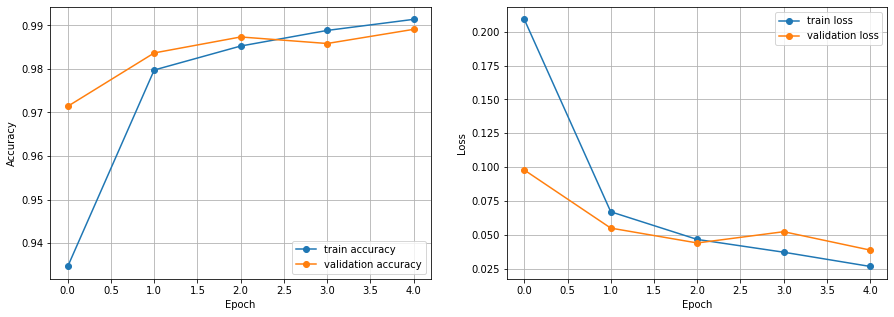

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [34]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0341 - accuracy: 0.9907

Test Loss: 0.03409114107489586

Test Accuracy: 0.9907000064849854


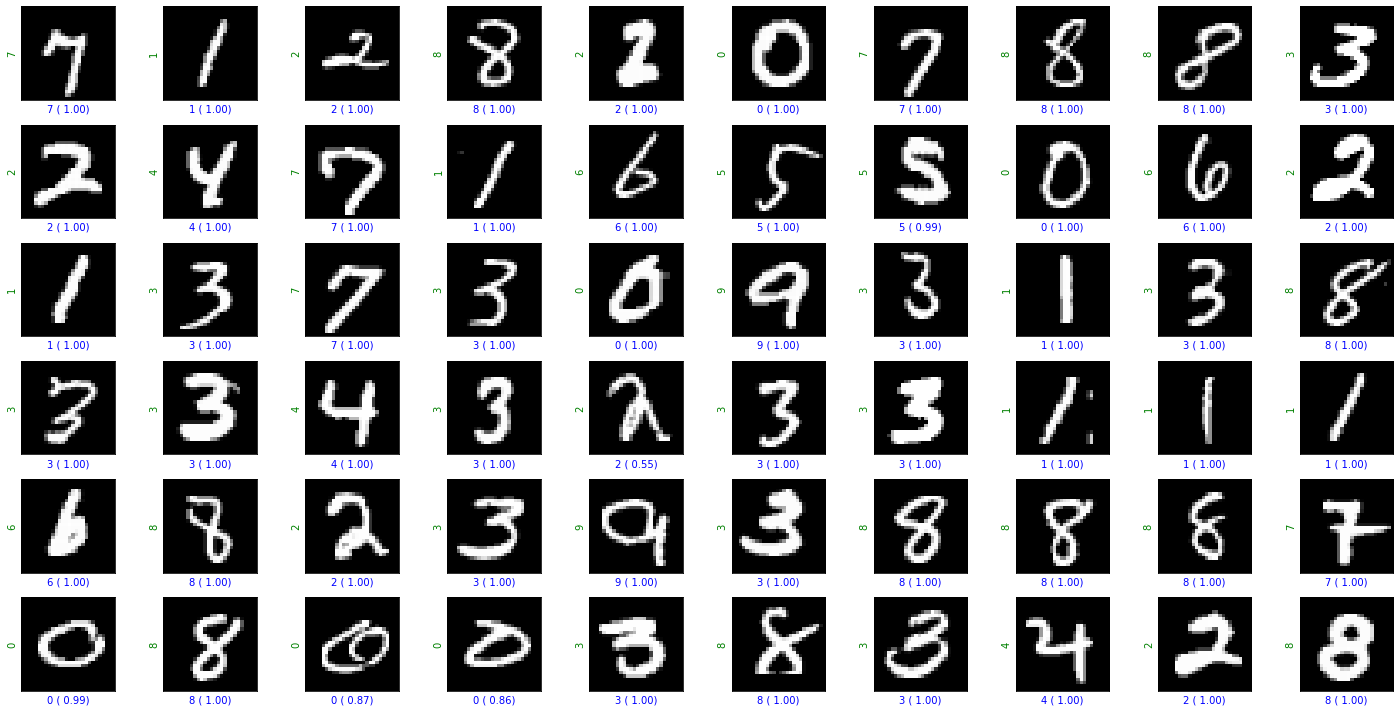

In [37]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,10))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()